In [6]:
# from mf.mf import godec
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import roc_curve, auc
import seaborn as sns

# plt.style.use('fivethirtyeight')
# Plot options
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 6
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['figure.figsize'] = (5,4)
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True#默认为false，此处设置为TRUE
plt.rcParams['font.family'] = 'Times New Roman'

# config
att_times = 100

In [2]:
def estimate_c(H, A_new, times):
    P_inv = np.linalg.inv(H.T@H)
    c_new = []
    for i in range(times):
        c_est = P_inv@H.T@A_new[i,:].T
        c_new.append(c_est)
    c_new = np.array(c_new)
    return c_new

In [3]:
#load data
path = "E:\MY\paper\FDILocation\code\data\case14"

# single-bus with 5% noise
za_sin5_sum = scio.loadmat(path+"\\single\\za_5.mat")['za'][:,:,0]
a_sin5_sum = scio.loadmat(path+"\\single\\a_5.mat")['a'][:,:,0]
a_new_sin5_sum = scio.loadmat(path+"\\LRMF\\a_new_sin5.mat")['A']
c_sin5_true_sum = scio.loadmat(path+"\\single\\c_5.mat")['c'][:,:,0]

# uncoordinate multiple-bus with 5% noise
za_um5_sum = scio.loadmat(path+"\\unmul\\za_5.mat")['za'][:,:,0]
a_um5_sum = scio.loadmat(path+"\\unmul\\a_5.mat")['a'][:,:,0]
a_new_um5_sum = scio.loadmat(path+"\\LRMF\\a_new_um5.mat")['A']
c_um5_true_sum = scio.loadmat(path+"\\unmul\\c_5.mat")['c'][:,:,0]

# coordinate multiple-bus with 5% noise
za_co5_sum = scio.loadmat(path+"\\comul\\za_5.mat")['za'][:,:,0]
a_co5_sum = scio.loadmat(path+"\\comul\\a_5.mat")['a'][:,:,0]
a_new_co5_sum = scio.loadmat(path+"\\LRMF\\a_new_co5.mat")['A']
c_co5_true_sum = scio.loadmat(path+"\\comul\\c_5.mat")['c'][:,:,0]
# detection
a_new_sin5_dec_sum = scio.loadmat(path+"\\LRMF\\a_new_sin5-dec.mat")['A']

H = scio.loadmat(path+"\\H.mat")['h']
Wr_5 = scio.loadmat(path+"\\W-5.mat")['w']

c_new_sin5_sum = estimate_c(H, a_new_sin5_sum, att_times)
c_new_um5_sum = estimate_c(H, a_new_um5_sum, att_times)
c_new_co5_sum = estimate_c(H, a_new_co5_sum, att_times)

[Text(1, 0, '1'), Text(30, 0, '30'), Text(60, 0, '60'), Text(90, 0, '90')]

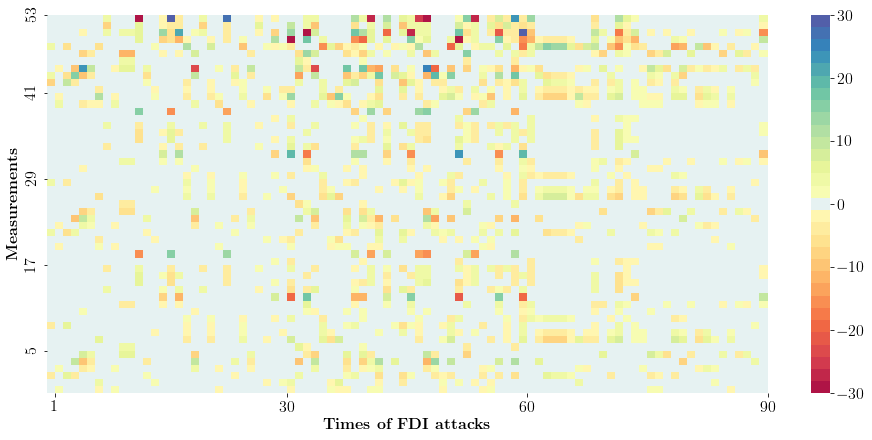

In [5]:

plt.figure(figsize=(12, 6))
a_new_sin5 = a_new_sin5_sum[:30,:]
a_new_um5 = a_new_um5_sum[:30,:]
a_new_co5 = a_new_co5_sum[:30,:]
a1 = np.vstack((a_new_sin5, a_new_um5))
a = np.vstack((a1, a_new_co5))
a = a.T
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(a, cmap=cm, vmin=-30, vmax=30)
# Axis name
plt.xlabel(r'\textbf{Times of FDI attacks}')
plt.ylabel(r'\textbf{Measurements}')

ax = plt.gca()
ylabel = np.linspace(0, 47, 5,dtype=int)
ylabel_inv = np.linspace(53, 5, 5,dtype=int)
xlabel = np.linspace(0, 89, 4,dtype=int)
xlabel_1 = np.linspace(1, 90, 4,dtype=int)

plt.yticks(ylabel)
ax.set_yticklabels(ylabel_inv)
plt.xticks(xlabel_1)
ax.set_xticklabels(xlabel_1)

# plt.show()
# plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_a_new.eps", dpi=600)

[Text(1, 0, '1'), Text(30, 0, '30'), Text(60, 0, '60'), Text(90, 0, '90')]

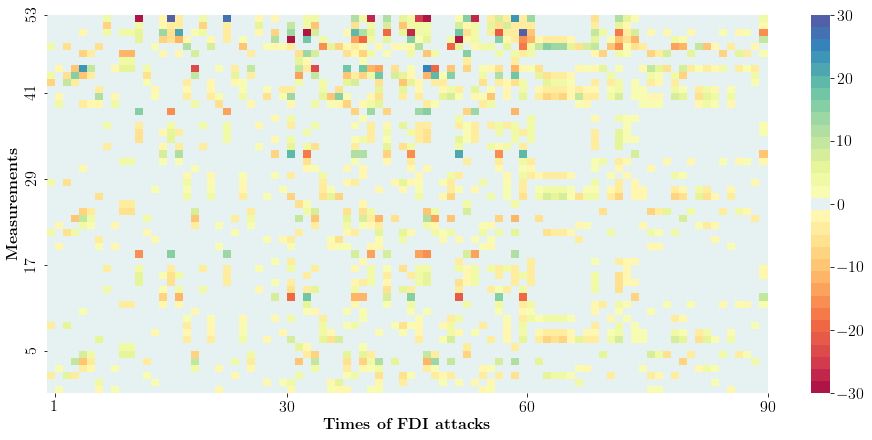

In [6]:
plt.figure(figsize=(12, 6))
a_sin5 = a_sin5_sum[:30,:]
a_um5 = a_um5_sum[:30,:]
a_co5 = a_co5_sum[:30,:]
a1 = np.vstack((a_sin5, a_um5))
a = np.vstack((a1, a_co5))
a = a.T
# cm = sns.diverging_palette(220, 20,sep = 1, n = 41)
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(a, cmap=cm, vmin=-30, vmax=30)
# Axis name
plt.xlabel(r'\textbf{Times of FDI attacks}')
plt.ylabel(r'\textbf{Measurements}')

ax = plt.gca()
ylabel = np.linspace(0, 47, 5,dtype=int)
ylabel_inv = np.linspace(53, 5, 5,dtype=int)
xlabel = np.linspace(0, 89, 4,dtype=int)
xlabel_1 = np.linspace(1, 90, 4,dtype=int)

plt.yticks(ylabel)
ax.set_yticklabels(ylabel_inv)
plt.xticks(xlabel_1)
ax.set_xticklabels(xlabel_1)

# plt.show()
# plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_a.eps", dpi=600)

[Text(1, 0, '1'), Text(30, 0, '30'), Text(60, 0, '60'), Text(90, 0, '90')]

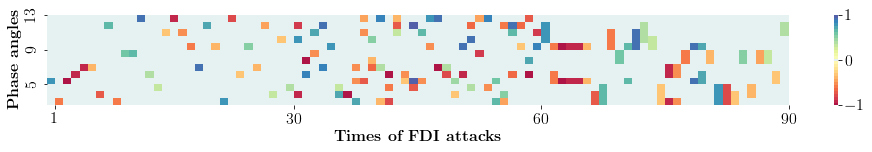

In [7]:
plt.figure(figsize=(12, 2))
c_sin5 = c_sin5_true_sum[:30,:]
c_um5 = c_um5_true_sum[:30,:]
c_co5 = c_co5_true_sum[:30,:]
c1 = np.vstack((c_sin5, c_um5))
c = np.vstack((c1, c_co5))
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(c.T, cmap=cm,vmin=-1, vmax=1)
# Axis name
plt.xlabel(r'\textbf{Times of FDI attacks}')
plt.ylabel(r'\textbf{Phase angles}')

ax = plt.gca()
ylabel = np.linspace(0, 10, 3,dtype=int)
ylabel_inv = np.linspace(13, 5, 3,dtype=int)
xlabel = np.linspace(0, 89, 4,dtype=int)
xlabel_1 = np.linspace(1, 90, 4,dtype=int)

plt.yticks(ylabel)
ax.set_yticklabels(ylabel_inv)
plt.xticks(xlabel_1)
ax.set_xticklabels(xlabel_1)

# plt.show()
# plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_c.eps", dpi=600)

[Text(1, 0, '1'), Text(30, 0, '30'), Text(60, 0, '60'), Text(90, 0, '90')]

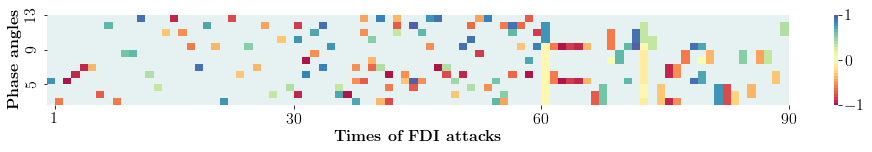

In [8]:
plt.figure(figsize=(12, 2))
c_new_sin5 = c_new_sin5_sum[:30,:]
c_new_um5 = c_new_um5_sum[:30,:]
c_new_co5 = c_new_co5_sum[:30,:]
c1_new = np.vstack((c_new_sin5, c_new_um5))
c_new = np.vstack((c1, c_new_co5))
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(c_new.T, cmap=cm, vmin=-1, vmax=1)
# Axis name
plt.xlabel(r'\textbf{Times of FDI attacks}')
plt.ylabel(r'\textbf{Phase angles}')

ax = plt.gca()
ylabel = np.linspace(0, 10, 3,dtype=int)
ylabel_inv = np.linspace(13, 5, 3,dtype=int)
xlabel = np.linspace(0, 89, 4,dtype=int)
xlabel_1 = np.linspace(1, 90, 4,dtype=int)

plt.yticks(ylabel)
ax.set_yticklabels(ylabel_inv)
plt.xticks(xlabel_1)
ax.set_xticklabels(xlabel_1)

# plt.show()
# plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_cnew.eps", dpi=600)

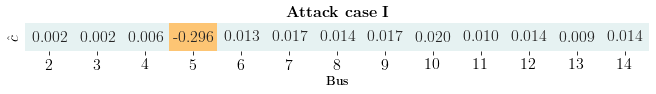

In [16]:
import seaborn as sns
plt.figure(figsize=(9, 1.2))
c_new5 = c_new_sin5_sum[28:29,:]
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(c_new5, cmap=cm,vmin=-1, vmax=1,cbar=False,annot=True,fmt='.3f')

plt.xlabel(r'\textbf{Bus}', fontdict={'size': 12})
plt.ylabel(r'$\hat{c}$')
plt.title(r'\textbf{Attack case I}', fontdict={'size': 16})
plt.yticks([])

xlabel = np.linspace(2, 14, 13,dtype=int)
# xlabel_1 = np.linspace(2, 90, 4,dtype=int)
# plt.xticks(xlabel)
ax.set_xticklabels(xlabel)
# plt.show()
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_cs_I.eps", dpi=600)


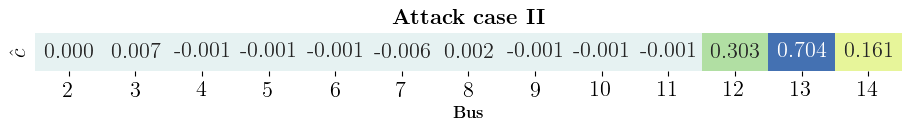

In [9]:
plt.figure(figsize=(9, 1.2))
# c_new5 = c_new_um5_sum[5:6,:]
c_new5 = [[0.000,0.007,-0.001,-0.001,-0.001,-0.006,0.002,-0.001,-0.001,-0.001,0.303,0.704,0.161]]
# c_new5[:, 12] = 0.161
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(c_new5, cmap=cm,vmin=-0.8, vmax=0.8,cbar=False,annot=True, fmt='.3f')

plt.xlabel(r'\textbf{Bus}', fontdict={'size': 12})
plt.ylabel(r'$\hat{c}$')
plt.title(r'\textbf{Attack case II}', fontdict={'size': 16})
plt.yticks([])

xlabel = np.linspace(2, 14, 13,dtype=int)
# xlabel_1 = np.linspace(2, 90, 4,dtype=int)
# plt.xticks(xlabel)
ax.set_xticklabels(xlabel)
# plt.show()
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_cs_II.eps", dpi=600)


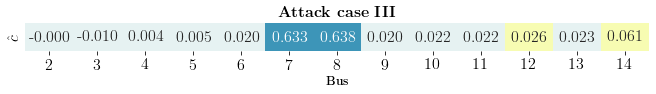

In [18]:
plt.figure(figsize=(9, 1.2))
c_new5 = c_new_co5_sum[9:10,:]
c_new5[:, 12] = 0.061
cm = sns.color_palette("Spectral", 31)
cm[15] = [0.9,0.95,0.95]
ax = sns.heatmap(c_new5, cmap=cm,vmin=-0.8, vmax=0.8,cbar=False,annot=True, fmt='.3f')

plt.xlabel(r'\textbf{Bus}', fontdict={'size': 12})
plt.ylabel(r'$\hat{c}$')
plt.title(r'\textbf{Attack case III}', fontdict={'size': 16})
plt.yticks([])

xlabel = np.linspace(2, 14, 13,dtype=int)
# xlabel_1 = np.linspace(2, 90, 4,dtype=int)
# plt.xticks(xlabel)
ax.set_xticklabels(xlabel)
# plt.show()
plt.savefig("E:\\MY\\paper\\FDILocation\\code\\pic\\CDF\\0801\\heatmap_cs_III.eps", dpi=600)


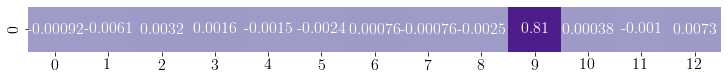

In [12]:
plt.figure(figsize=(10, 1))
c_new = c_new_sin5_sum[:1,:]
ax = sns.heatmap(c_new, cmap="Purples",vmin=-1, vmax=1,cbar=False,annot=True)
plt.show()

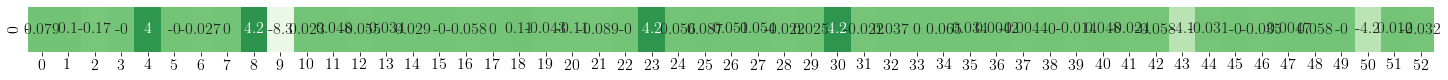

In [13]:
plt.figure(figsize=(20, 1))
a_new = a_new_sin5_sum[:1,:]
ax = sns.heatmap(a_new, cmap="Greens",vmin=-10, vmax=10,cbar=False,annot=True)
plt.show()

In [14]:
cm = sns.color_palette("coolwarm", 21)
# cm = sns.diverging_palette(220, 20,sep = 1, n = 21)
cm[10] = [1,1,1]
cm

[(0.2805499502352941, 0.37342316908235296, 0.818010743309804),
 (0.3383765114431373, 0.45281860883137254, 0.8793170768784313),
 (0.3940416781333333, 0.5224134538666667, 0.9249162929333333),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.5216962808313725, 0.6595986063529412, 0.9877360232470589),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.6461128107647058, 0.7644364965294117, 0.9968684625058823),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.7633627801019607, 0.8350922218196078, 0.9556576765568627),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 [1, 1, 1],
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.9434315296666667, 0.8022762536156862, 0.7291715979137255),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.9695216017294117, 0.7008328676235294, 0.5875080175294117),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9476541841529411, 0.5659764341686274, 0.4474781480392157),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.8771493346, 0.39464545866666667, 0.31172382573333335),
 (0.8301865219490197, 0.30473276355294115, 0.25489142806666665),
 (0.7689286228901963, 0.18921335770980421, 0.19796539314901973)]

In [15]:
# cm = sns.color_palette("vlag", 21)
cm = sns.diverging_palette(220, 20,sep = 1, n = 21)
cm[10] = [1,1,1]
cm

[(0.24715576253545807, 0.49918708160096675, 0.5765599057376697),
 (0.3121761030659622, 0.5413346727411328, 0.6118315516829688),
 (0.3826148053073417, 0.5869945631429792, 0.6500425014570428),
 (0.45305350754872115, 0.6326544535448256, 0.6882534512311168),
 (0.5234922097901006, 0.6783143439466721, 0.7264644010051908),
 (0.5966295101492012, 0.7257235240198634, 0.7661392618658618),
 (0.6616498506797053, 0.7678711151600294, 0.8014109078111609),
 (0.7320885529210849, 0.8135310055618759, 0.8396218575852348),
 (0.8025272551624643, 0.8591908959637222, 0.8778328073593089),
 (0.8729659574038438, 0.9048507863655688, 0.9160437571333829),
 [1, 1, 1],
 (0.9331883572185087, 0.8868095448055398, 0.8759851901188981),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8949837720876636, 0.7625558322202457, 0.7296414577650604),
 (0.875881479522241, 0.7004289759275987, 0.6564695915881414),
 (0.8562281592866621, 0.6365099987803562, 0.5811869985022731),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.819312175321964, 0.5164472354852363, 0.43977928897196844),
 (0.8002098827565414, 0.45432037919258916, 0.3666074227950496),
 (0.781107590191119, 0.39219352289994214, 0.29343555661813064),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]